In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_transform import analysis as al
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_excel("raw_data/regression_data.xls")

In [3]:
display(data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
# dropping duplicated rows

In [5]:
data = data.drop_duplicates()

In [6]:
data.shape # -> no duplicates

(21597, 21)

In [7]:
# split into continous and discrete data

In [8]:
data_continous, data_discrete = al.sep_cont_disc(data)

In [9]:
display(data_continous)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000
...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509,360000
21593,2310,5813,2310,0,1830,7200,400000
21594,1020,1350,1020,0,1020,2007,402101
21595,1600,2388,1600,0,1410,1287,400000


In [10]:
data_continous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sqft_living    21597 non-null  int64
 1   sqft_lot       21597 non-null  int64
 2   sqft_above     21597 non-null  int64
 3   sqft_basement  21597 non-null  int64
 4   sqft_living15  21597 non-null  int64
 5   sqft_lot15     21597 non-null  int64
 6   price          21597 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB


In [11]:
display(data_discrete)

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,3,2.25,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346
21593,6600060120,2015-02-23,4,2.50,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362
21594,1523300141,2014-06-23,2,0.75,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299
21595,291310100,2015-01-16,3,2.50,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069


In [12]:
data_discrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21597 non-null  int64         
 1   date          21597 non-null  datetime64[ns]
 2   bedrooms      21597 non-null  int64         
 3   bathrooms     21597 non-null  float64       
 4   floors        21597 non-null  float64       
 5   waterfront    21597 non-null  int64         
 6   view          21597 non-null  int64         
 7   condition     21597 non-null  int64         
 8   grade         21597 non-null  int64         
 9   yr_built      21597 non-null  int64         
 10  yr_renovated  21597 non-null  int64         
 11  zipcode       21597 non-null  int64         
 12  lat           21597 non-null  float64       
 13  long          21597 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 2.5 MB


In [13]:
# checking for NaN

In [14]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [15]:
# plotting discrete data

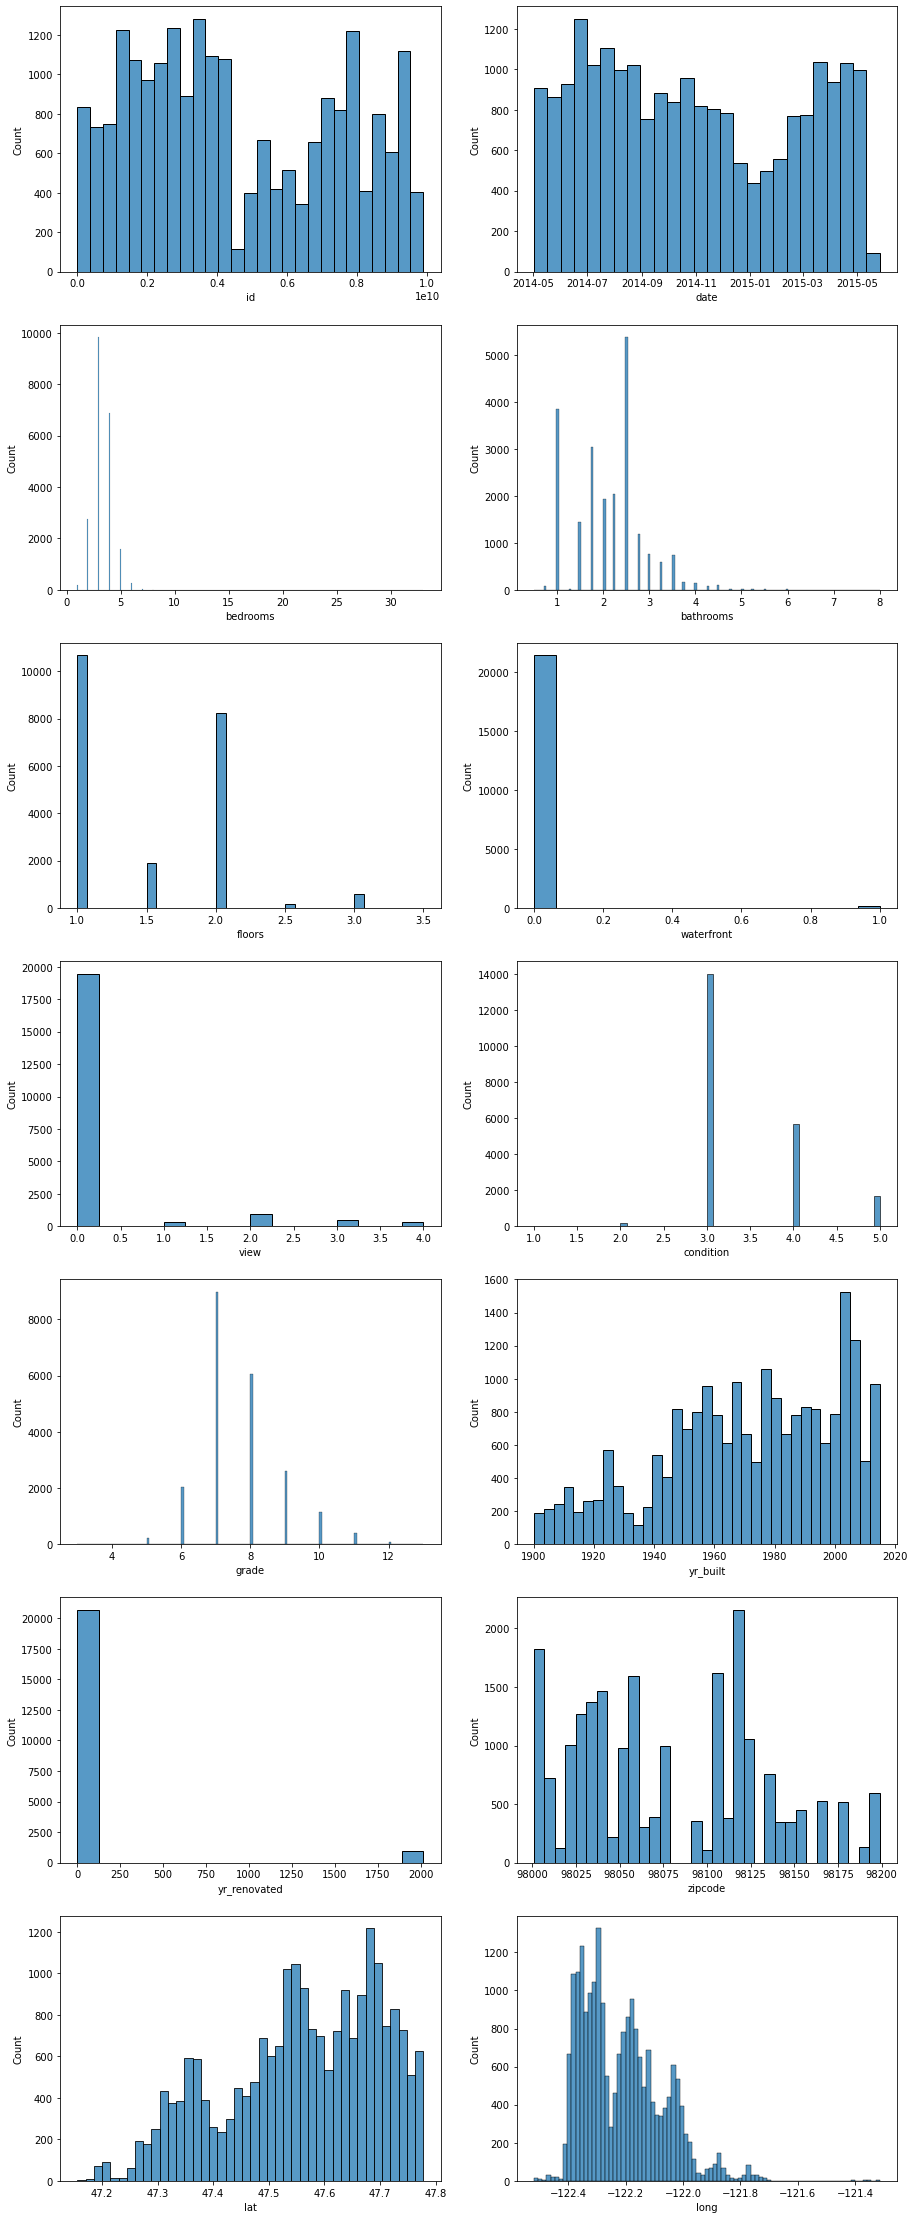

In [16]:
al.plot_discrete(data_discrete)

In [17]:
# plotting continous data

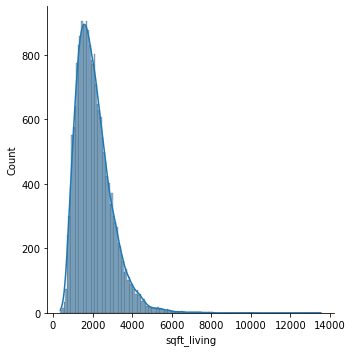

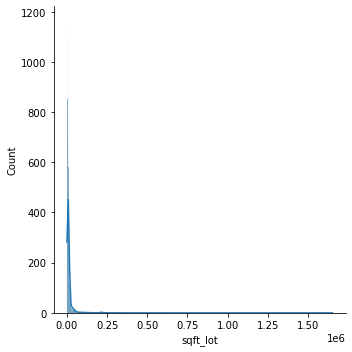

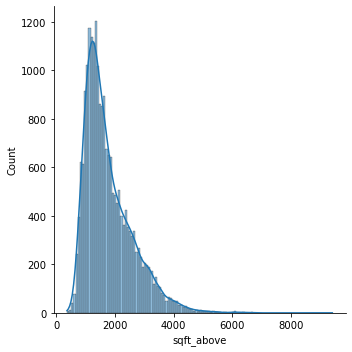

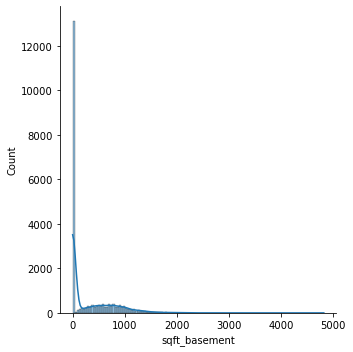

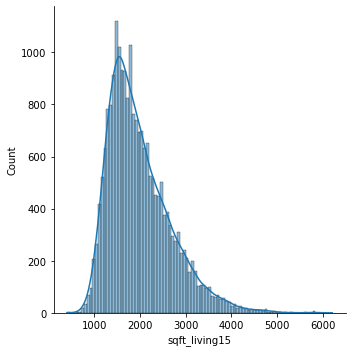

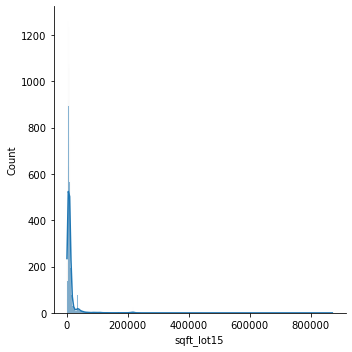

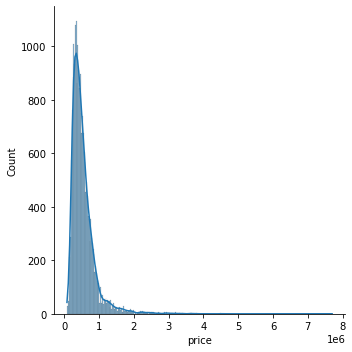

In [18]:
al.plot_continous(data_continous)

In [19]:
# boxplot continous data

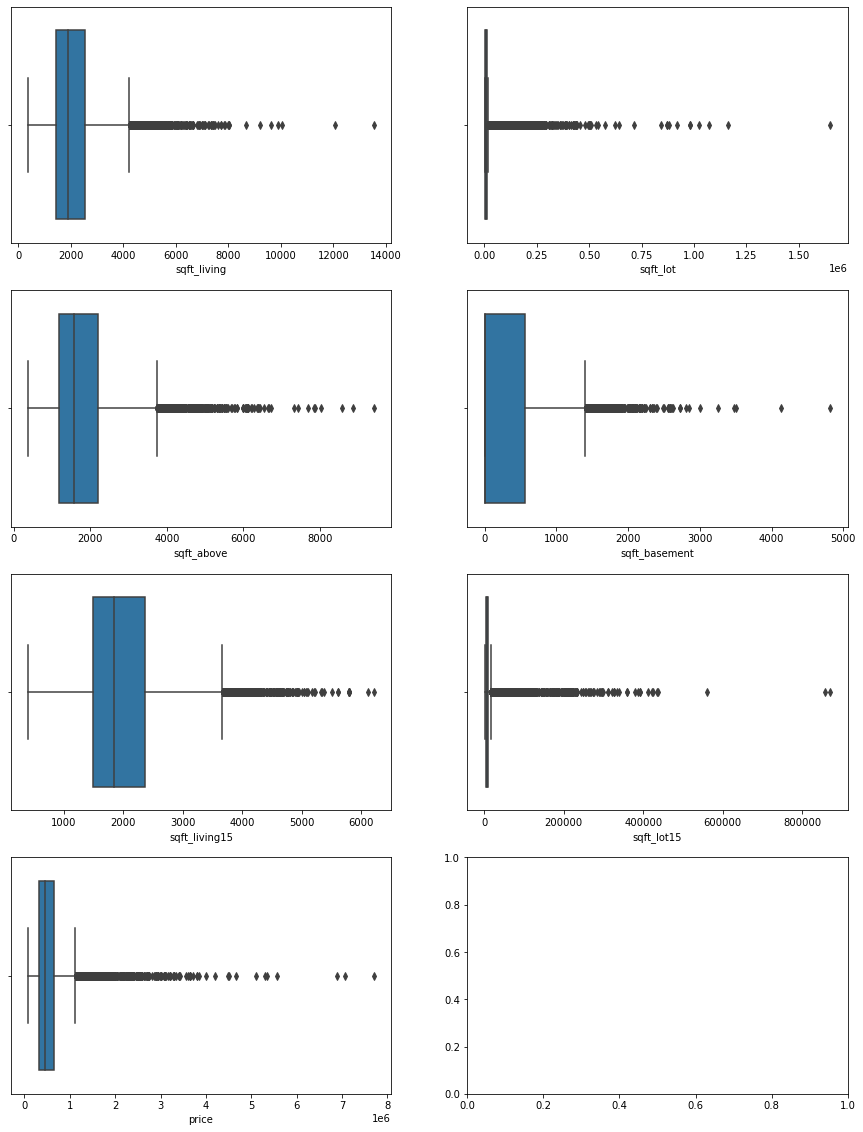

In [20]:
al.boxplot_continous(data_continous)

In [21]:
# check and search the suitable transformer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a depr

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py

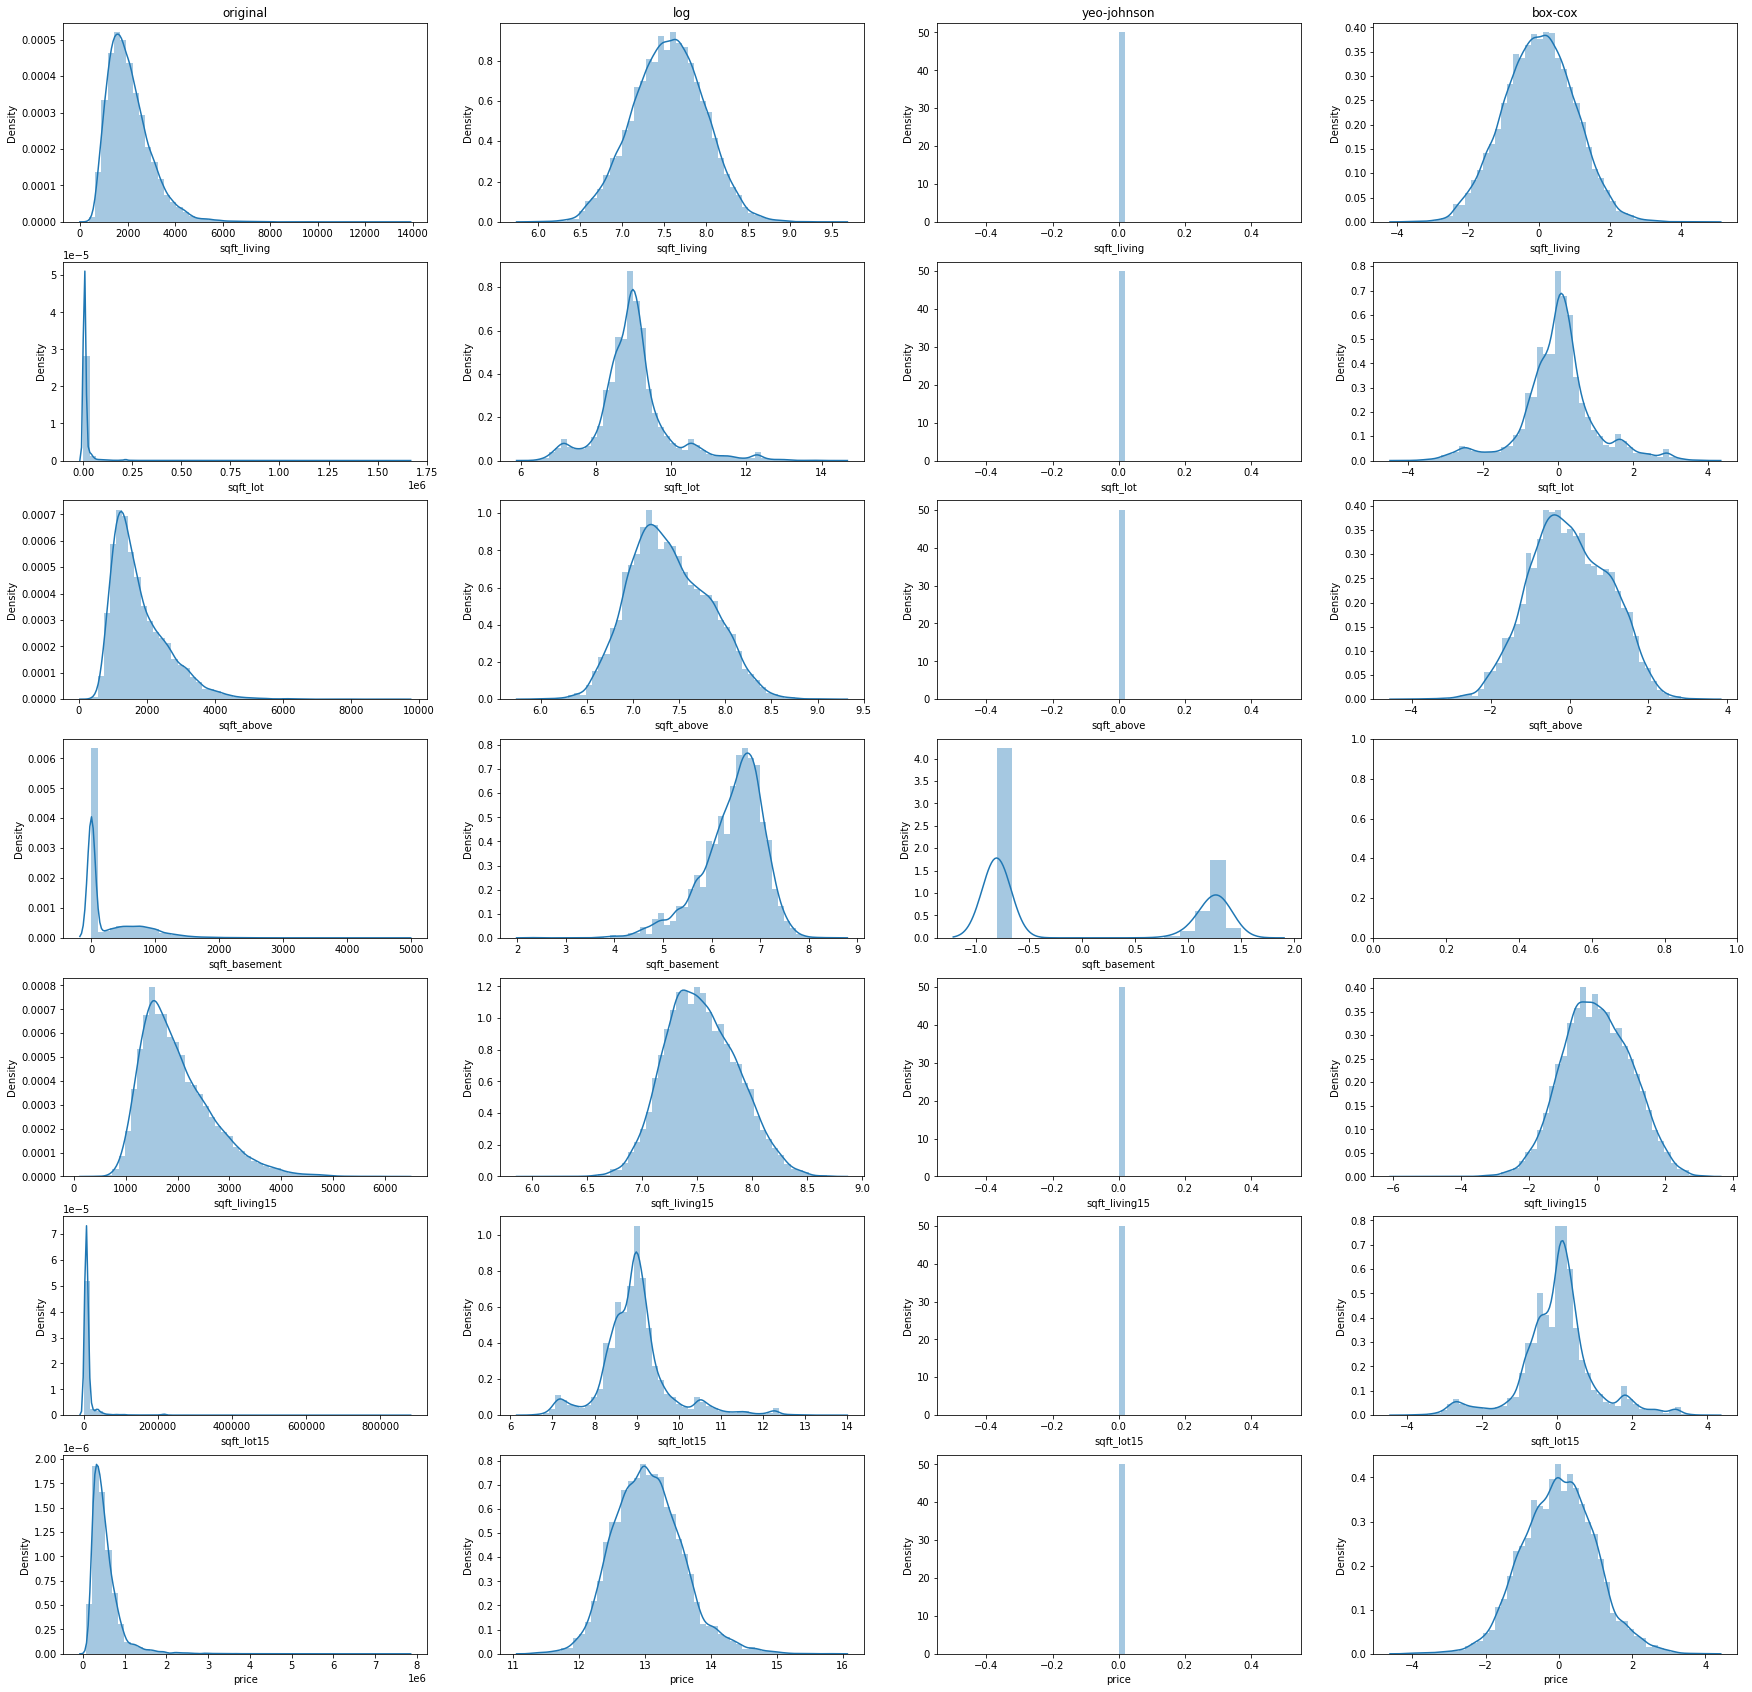

In [22]:
al.plot_transformer(data_continous)

In [32]:
# apply log transformation on the continous values

In [33]:
data_continous_log = al.log_it(data_continous)

In [34]:
display(data_continous_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,7.073270,8.639411,7.073270,NaN,7.200425,8.639411,12.309982
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614
2,6.646391,9.210340,6.646391,NaN,7.908387,8.994917,12.100712
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329
4,7.426549,8.997147,7.426549,NaN,7.495542,8.923058,13.142166
...,...,...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,NaN,7.333023,7.319202,12.793859
21593,7.745003,8.667852,7.745003,NaN,7.512071,8.881836,12.899220
21594,6.927558,7.207860,6.927558,NaN,6.927558,7.604396,12.904459
21595,7.377759,7.778211,7.377759,NaN,7.251345,7.160069,12.899220


In [35]:
data_continous_log.isna().sum()

sqft_living          0
sqft_lot             0
sqft_above           0
sqft_basement    13110
sqft_living15        0
sqft_lot15           0
price                0
dtype: int64

In [36]:
data_continous_log["sqft_basement"] = data_continous_log["sqft_basement"].fillna(0)

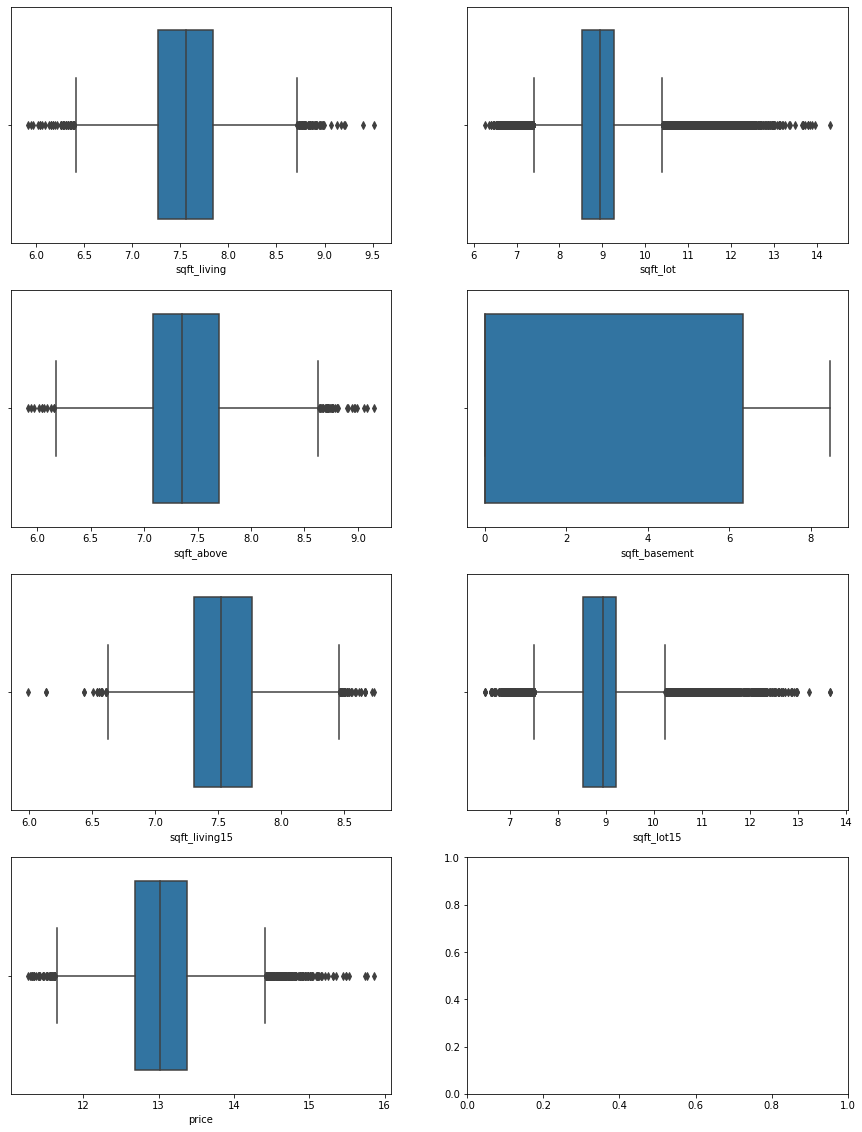

In [37]:
al.boxplot_continous(data_continous_log)

In [38]:
# removing outliers

In [39]:
# data with log transformation

In [40]:
cont_outl_rem_log, disc_outl_rem_log = al.remove_outliers(data_continous_log, data_discrete)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,id,date,bedrooms,...,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,12.309982,7129300520,2014-10-13,3,...,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614,6414100192,2014-12-09,3,...,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,12.100712,5631500400,2015-02-25,2,...,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329,2487200875,2014-12-09,4,...,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,13.142166,1954400510,2015-02-18,3,...,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,0.000000,7.333023,7.319202,12.793859,263000018,2014-05-21,3,...,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346
21593,7.745003,8.667852,7.745003,0.000000,7.512071,8.881836,12.899220,6600060120,2015-02-23,4,...,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362
21594,6.927558,7.207860,6.927558,0.000000,6.927558,7.604396,12.904459,1523300141,2014-06-23,2,...,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299
21595,7.377759,7.778211,7.377759,0.000000,7.251345,7.160069,12.899220,291310100,2015-01-16,3,...,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069


3560 rows have been removed, 16.48377089410566% in total


In [41]:
display(cont_outl_rem_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,12.309982
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,12.100712
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,13.142166
...,...,...,...,...,...,...,...
21586,7.313220,9.389992,7.313220,0.000000,7.185387,9.332823,12.319401
21587,7.727535,8.619027,7.727535,0.000000,7.727535,8.653645,13.136759
21589,7.832014,8.703341,7.832014,0.000000,7.832014,8.703341,13.322337
21590,8.163371,8.881836,7.863267,6.813445,7.625595,8.732305,13.825461


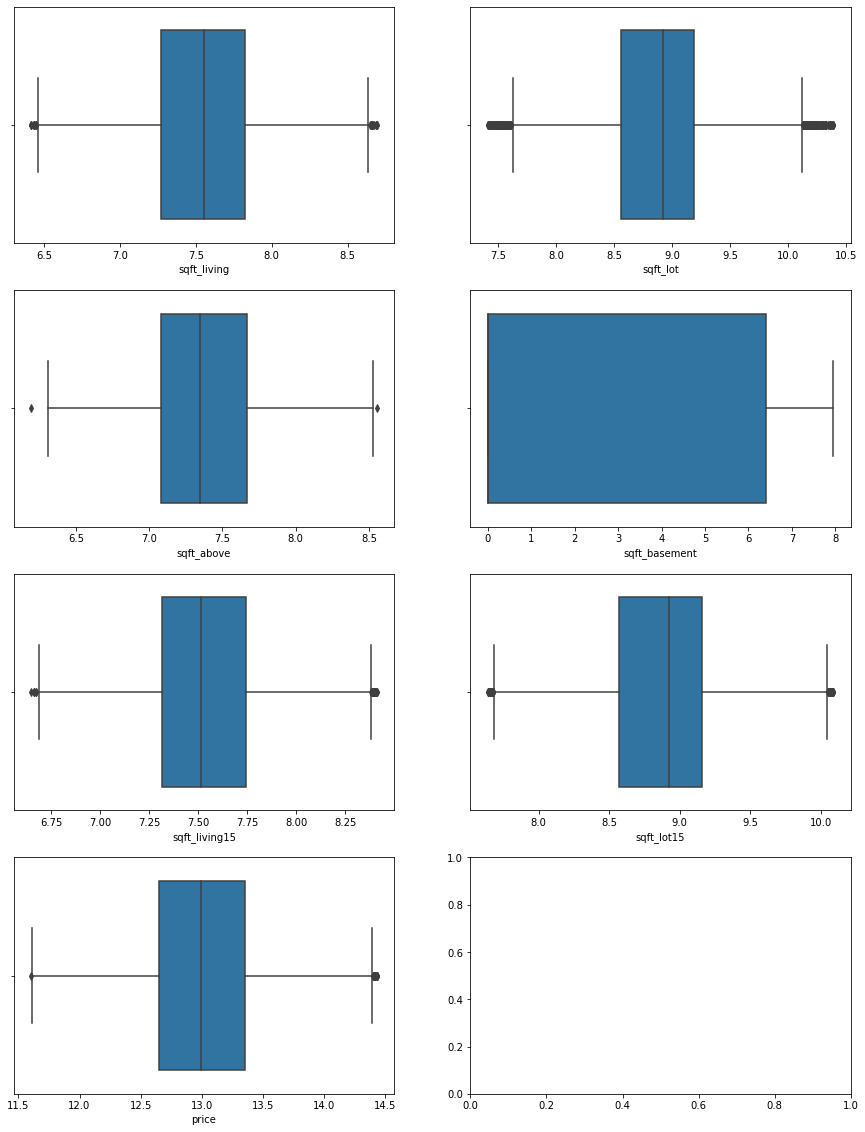

In [42]:
al.boxplot_continous(cont_outl_rem_log)

In [43]:
# data without log transformation

In [44]:
cont_outl_rem, disc_outl_rem = al.remove_outliers(data_continous, data_discrete)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,id,date,bedrooms,...,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,1180,5650,1180,0,1340,5650,221900,7129300520,2014-10-13,3,...,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257
1,2570,7242,2170,400,1690,7639,538000,6414100192,2014-12-09,3,...,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319
2,770,10000,770,0,2720,8062,180000,5631500400,2015-02-25,2,...,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233
3,1960,5000,1050,910,1360,5000,604000,2487200875,2014-12-09,4,...,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393
4,1680,8080,1680,0,1800,7503,510000,1954400510,2015-02-18,3,...,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509,360000,263000018,2014-05-21,3,...,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346
21593,2310,5813,2310,0,1830,7200,400000,6600060120,2015-02-23,4,...,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362
21594,1020,1350,1020,0,1020,2007,402101,1523300141,2014-06-23,2,...,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299
21595,1600,2388,1600,0,1410,1287,400000,291310100,2015-01-16,3,...,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069


4893 rows have been removed, 22.65592443394916% in total


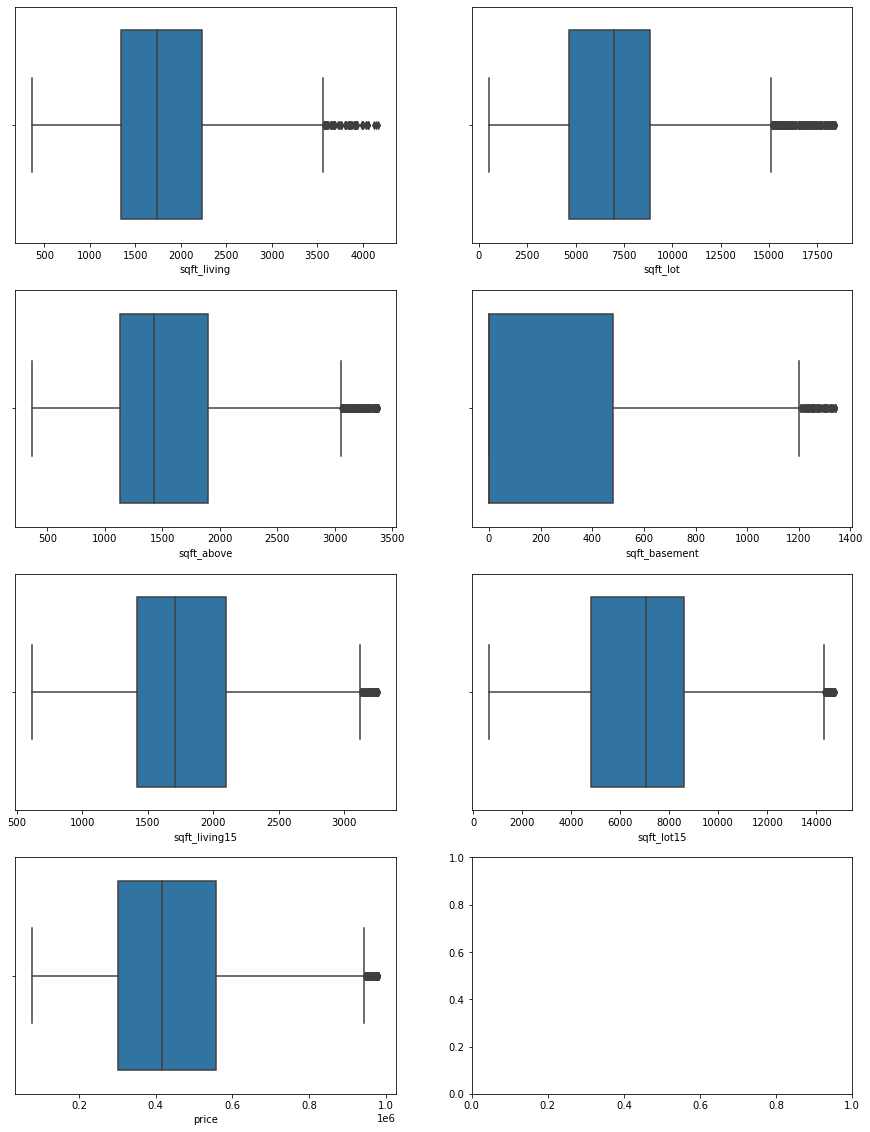

In [45]:
al.boxplot_continous(cont_outl_rem)

In [46]:
# Correlation-Matrix outliers removed log

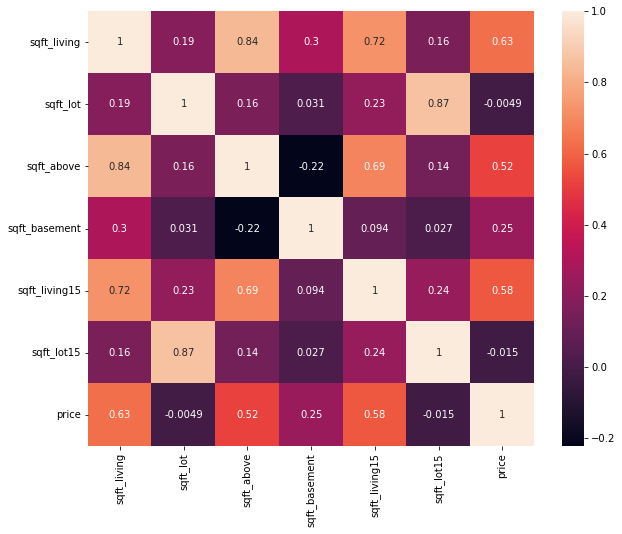

In [47]:
corr_matrix=cont_outl_rem_log.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [48]:
# Correlation-Matrix outliers removed log

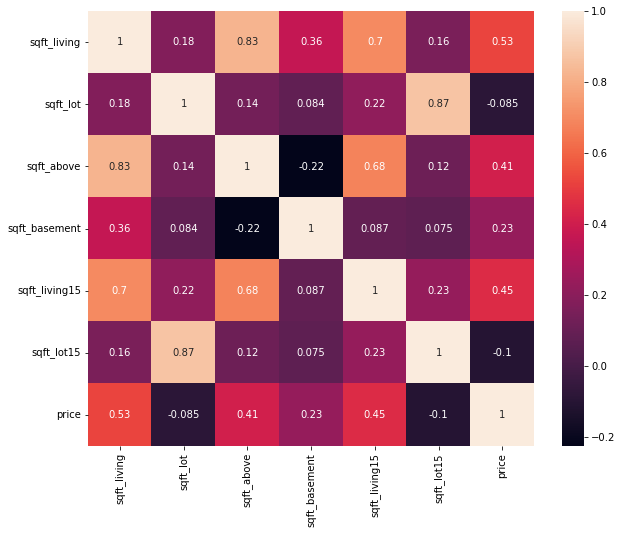

In [49]:
corr_matrix=cont_outl_rem.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [50]:
# Correlation-Matrix before removing outliers

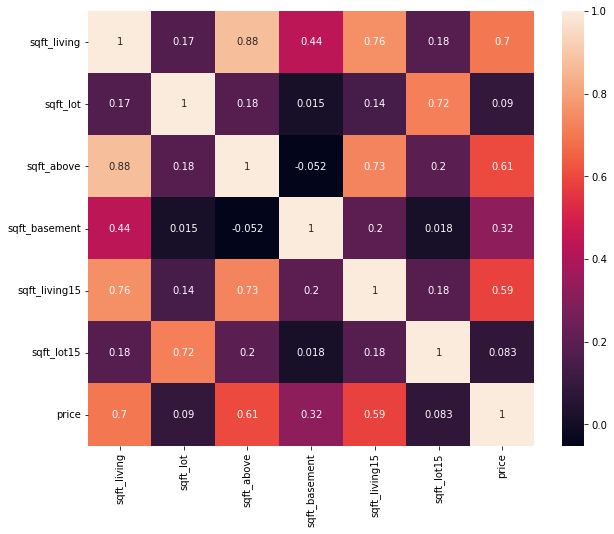

In [51]:
corr_matrix=data_continous.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
# convert the date in month since the house was sold from today

In [53]:
disc_outl_rem_log["date"] = disc_outl_rem_log["date"].apply(al.months)

In [54]:
disc_outl_rem["date"] = disc_outl_rem["date"].apply(al.months)

In [55]:
# drop column id

In [56]:
disc_outl_rem_log = disc_outl_rem_log.drop(columns=["id"])

In [57]:
disc_outl_rem = disc_outl_rem.drop(columns=["id"])

In [58]:
# concat dataframes

In [59]:
final_cleaned_log = pd.concat([cont_outl_rem_log, disc_outl_rem_log], axis=1)

In [60]:
final_cleaned = pd.concat([cont_outl_rem, disc_outl_rem], axis=1)

In [61]:
final_cleaned_log.isna().sum()

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
price            0
date             0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [62]:
final_cleaned.isna().sum()

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
price            0
date             0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [63]:
X_log = final_cleaned_log.drop(columns=["price"])
y_log = final_cleaned_log[["price"]]
X = final_cleaned.drop(columns=["price"])
y = final_cleaned[["price"]]

In [64]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=0, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [65]:
# creating and checking model - linear regression and knn

In [66]:
# with transformed data

In [67]:
#r2_score(np.exp(y_train_log),np.exp(y_pred_train_log))

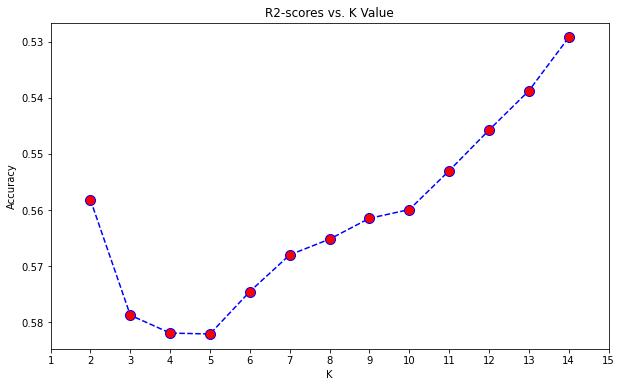

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6986478253748063
MSE: 22896768467.60003
RMSE: 151316.78184391852
MAE: 106296.22007422108
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.7030580081818115
MSE: 21978935335.068485
RMSE: 148252.94376527058
MAE: 105765.55704069884
-----------------------------
Filename Linear: real_estate_log_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7174330399018438
MSE: 21469465982.808815
RMSE: 146524.62585793834
MAE: 91420.51262041721
Filename knn: real_estate_log_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5820914900594585
MSE: 30932587404.417656
RMSE: 175876.6255203279
MAE: 112046.14988913525
-----------------------------


In [68]:
pickle_files_log = al.regression_automation(X_test_log, np.exp(y_test_log), "real_estate_log", X_train_log, np.exp(y_train_log))

In [69]:
# with "raw" data

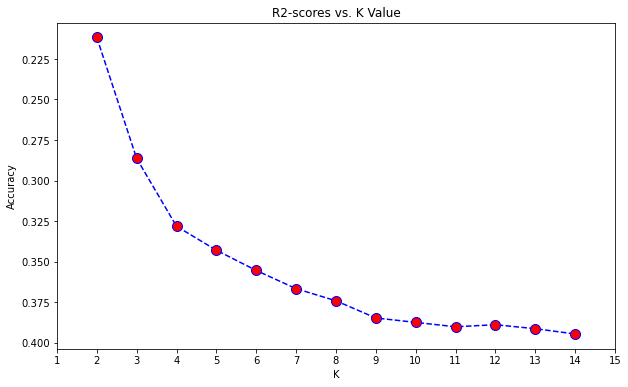

Please enter k:6
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6779681635542624
MSE: 10651290767.9937
RMSE: 103205.0908046386
MAE: 79008.77526101947
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6645811695225987
MSE: 10699157191.830618
RMSE: 103436.73038060812
MAE: 78656.96741472758
-----------------------------
Filename Linear: real_estate_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.5561818253339448
MSE: 14679407100.43713
RMSE: 121158.60308057835
MAE: 94818.59167103196
Filename knn: real_estate_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.3554377052549643
MSE: 20560185310.969975
RMSE: 143388.23281904962
MAE: 112410.17624463735
-----------------------------


In [70]:
pickle_files = al.regression_automation(X_test, y_test, "real_estate", X_train, y_train)

In [ ]:
# so with the transformed data we achieve better results

In [71]:
# performing with MinMaxScaler

In [72]:
X_train_log_scaled, pickle_scaler = al.min_max(X_train_log, "real_estate_scaler_log")

In [73]:
X_test_log_scaled = al.min_max(X_test_log, pickle_scaler, fit=False )

In [74]:
display(X_train_log_scaled)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,0.706090,0.509210,0.774757,0.000000,0.589850,0.673889,84,5,2.75,2.0,0,0,3,8,2014,0,98056,47.5245,-122.184
1,0.447065,0.763757,0.524591,0.000000,0.288055,0.731493,88,3,2.00,1.0,0,0,3,7,1984,0,98074,47.6359,-122.035
2,0.289471,0.662099,0.372387,0.000000,0.392867,0.556399,93,3,1.00,1.0,0,0,4,7,1948,0,98177,47.7153,-122.363
3,0.262642,0.496065,0.346475,0.000000,0.396536,0.510841,92,3,2.00,1.0,0,0,4,7,1991,0,98031,47.4036,-122.191
4,0.695904,0.611265,0.764919,0.000000,0.767026,0.644617,85,4,2.50,2.0,0,0,3,9,1993,0,98006,47.5515,-122.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,0.597270,0.440217,0.416670,0.876851,0.484428,0.375551,82,4,2.00,1.0,0,2,4,8,1949,0,98199,47.6506,-122.405
14425,0.278173,0.447104,0.361475,0.000000,0.660638,0.538412,90,3,2.00,1.0,0,0,3,7,1952,2006,98155,47.7489,-122.284
14426,0.546517,0.522333,0.406854,0.846429,0.632410,0.581099,91,4,2.50,1.0,0,0,3,8,1975,0,98052,47.6743,-122.145
14427,0.646066,0.297452,0.716786,0.000000,0.627566,0.317887,94,4,2.50,2.0,0,0,3,8,2001,0,98053,47.6876,-122.038


In [75]:
display(X_test_log_scaled)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,0.611774,0.606859,0.447840,0.874479,0.620220,0.644942,87,4,1.75,1.0,1,4,3,7,1961,0,98178,47.5105,-122.238
1,0.431206,0.334943,0.509274,0.000000,0.490657,0.366019,94,4,2.50,2.0,0,0,3,7,2003,0,98038,47.3546,-122.015
2,0.523141,0.511655,0.386512,0.838714,0.487551,0.542606,93,4,2.25,1.0,0,0,3,7,1974,0,98034,47.7328,-122.200
3,0.674793,0.448978,0.744530,0.000000,0.729686,0.506477,91,4,2.50,2.0,0,0,3,9,2013,0,98056,47.5135,-122.169
4,0.452226,0.663172,0.330924,0.812245,0.164892,0.656902,82,5,1.75,1.0,0,0,3,7,1958,0,98146,47.5060,-122.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,0.364473,0.478641,0.444824,0.000000,0.370343,0.557658,83,3,1.50,1.0,0,0,4,7,1986,0,98038,47.3639,-122.048
3604,0.520953,0.633420,0.441787,0.806210,0.385458,0.610618,89,4,1.75,1.0,0,0,4,7,1961,0,98003,47.3203,-122.321
3605,0.262642,0.436802,0.346475,0.000000,0.370343,0.556399,85,3,1.00,1.0,0,0,3,6,1949,0,98166,47.4705,-122.352
3606,0.564757,0.297452,0.638258,0.000000,0.602702,0.331840,93,3,2.75,2.0,0,0,3,8,2008,0,98053,47.6954,-122.017


In [76]:
# # creating and checking model - linear regression and knn - scaled data

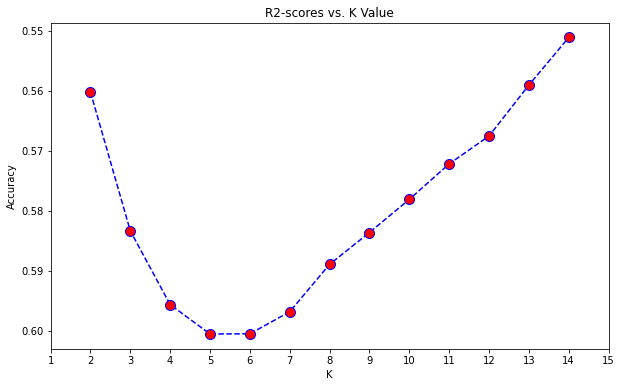

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6986478253748067
MSE: 22896768467.59999
RMSE: 151316.7818439184
MAE: 106296.22007422072
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.703058008181813
MSE: 21978935335.06837
RMSE: 148252.9437652702
MAE: 105765.55704069792
-----------------------------
Filename Linear: real_estate_scaled_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7309728404807695
MSE: 20440710576.153057
RMSE: 142971.0130626242
MAE: 89580.63763254558
Filename knn: real_estate_scaled_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.6005402860971465
MSE: 29567051689.379807
RMSE: 171950.72459684435
MAE: 108967.6475609756
-----------------------------


In [77]:
pickle_files_scaled = al.regression_automation(X_test_log_scaled, np.exp(y_test_log), "real_estate_scaled", X_train_log_scaled, np.exp(y_train_log))

In [78]:
# using OneHotEncoder on some of the discrete values

In [79]:
display(X_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,89,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,87,3,2.25,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,85,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,87,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,85,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,7.313220,9.389992,7.313220,0.000000,7.185387,9.332823,93,3,1.75,1.0,0,0,3,6,2014,0,98010,47.3095,-122.002
21587,7.727535,8.619027,7.727535,0.000000,7.727535,8.653645,91,3,2.50,2.0,0,0,3,8,2003,0,98065,47.5389,-121.881
21589,7.832014,8.703341,7.832014,0.000000,7.832014,8.703341,89,4,2.50,2.0,0,0,3,9,2014,0,98056,47.5137,-122.167
21590,8.163371,8.881836,7.863267,6.813445,7.625595,8.732305,84,4,3.50,2.0,0,0,3,9,2009,0,98136,47.5537,-122.398


In [80]:
X_one_hot = X_log.copy()

In [81]:
X_train_log_hot, X_test_log_hot, y_train_log_hot, y_test_log_hot, pickle_one_hot = al.one_hot(X_one_hot, "real_estate_one_hot", y= y_log)

In [82]:
display(X_train_log_hot)

,bedrooms_2,bedrooms_4,bedrooms_5,bedrooms_1,bedrooms_6,bedrooms_many,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,...,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,84,0,0,3,8,2014,0,98056,47.5245,-122.184
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,88,0,0,3,7,1984,0,98074,47.6359,-122.035
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93,0,0,4,7,1948,0,98177,47.7153,-122.363
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,92,0,0,4,7,1991,0,98031,47.4036,-122.191
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,85,0,0,3,9,1993,0,98006,47.5515,-122.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,82,0,2,4,8,1949,0,98199,47.6506,-122.405
14425,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,90,0,0,3,7,1952,2006,98155,47.7489,-122.284
14426,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,91,0,0,3,8,1975,0,98052,47.6743,-122.145
14427,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94,0,0,3,8,2001,0,98053,47.6876,-122.038


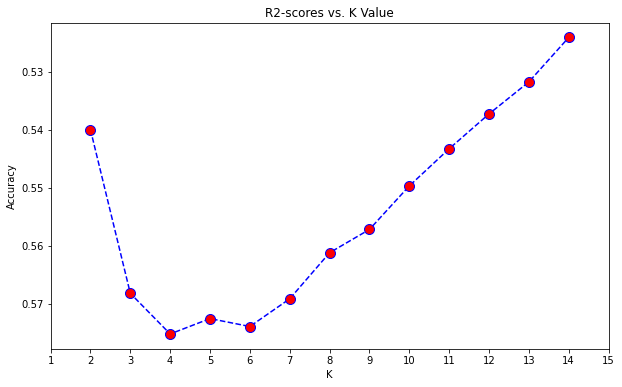

Please enter k:4
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.7097524144122462
MSE: 22053040678.230843
RMSE: 148502.6621924026
MAE: 104432.80821441294
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.7110862900517622
MSE: 21384701131.307278
RMSE: 146235.08857762994
MAE: 104918.17196615864
-----------------------------
Filename Linear: real_estate_onehot_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7485110002120969
MSE: 19108159439.87723
RMSE: 138232.2662762831
MAE: 86250.01013583755
Filename knn: real_estate_onehot_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5752367302300225
MSE: 31439960316.231503
RMSE: 177313.17017139902
MAE: 112159.80030487805
-----------------------------


In [83]:
pickle_files_onehot = al.regression_automation(X_test_log_hot, np.exp(y_test_log_hot), "real_estate_onehot", X_train_log_hot, np.exp(y_train_log_hot))

In [84]:
# now let#s try this with scaler

In [85]:
X_train_log_scaled_hot = al.min_max(X_train_log_hot, pickle_scaler, fit=False )

In [86]:
X_test_log_scaled_hot = al.min_max(X_test_log_hot, pickle_scaler, fit=False )

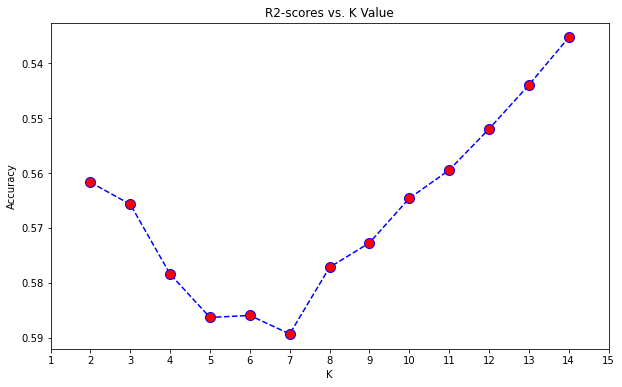

Please enter k:7
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.7097524144122465
MSE: 22053040678.23082
RMSE: 148502.66219240252
MAE: 104432.80821441286
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.7110862900517627
MSE: 21384701131.30724
RMSE: 146235.08857762982
MAE: 104918.17196615883
-----------------------------
Filename Linear: real_estate_onehot_scaled_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.6751557378824664
MSE: 24681699632.612236
RMSE: 157104.1044422845
MAE: 97953.45856063682
Filename knn: real_estate_onehot_scaled_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5892999724093546
MSE: 30399032798.475098
RMSE: 174353.1840789697
MAE: 110449.83984003802
----------------------

In [87]:
pickle_files_onehot_scaled = al.regression_automation(X_test_log_scaled_hot, np.exp(y_test_log_hot), "real_estate_onehot_scaled", X_train_log_scaled_hot, np.exp(y_train_log_hot))

In [88]:
# how is the performance of the original, "untouched" dataset?

In [89]:
X_plain = data.drop(columns=["price", "date"])
y_plain = data[["price"]]

In [90]:
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(X_plain, y_plain, random_state=0, test_size=0.2)

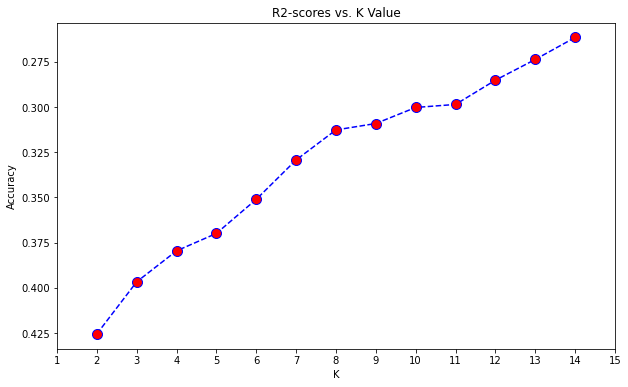

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6986493051859908
MSE: 41962575303.06188
RMSE: 204847.68805886456
MAE: 127733.55852486666
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.7059875804641567
MSE: 34610401291.170135
RMSE: 186038.70912036058
MAE: 124119.13589112597
-----------------------------
Filename Linear: real_estate_plain_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.5977495595827429
MSE: 56012694469.20242
RMSE: 236670.0117657546
MAE: 123331.76814261735
Filename knn: real_estate_plain_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.3698842682368144
MSE: 74175636425.94519
RMSE: 272352.04501884175
MAE: 155388.58407407408
-----------------------------


['real_estate_plain_linear.sav', 'real_estate_plain_knn.sav']

In [91]:
al.regression_automation(X_test_plain, y_test_plain, "real_estate_plain", X_train_plain, y_train_plain)